# Data Preprocessing with Pandas: The Titanic Dataset

The difference between data found in textbooks and data in the real world is that real-world data is rarely clean and homogeneous. The Titanic passenger dataset exemplifies this beautifully: it contains missing ages, cabins recorded inconsistently, and passenger information encoded in ways that are meaningful to humans but opaque to algorithms. Before any machine learning model can extract insights from such data, we must first *preprocess* it—cleaning, transforming, and reshaping the raw information into a form suitable for analysis.

Data preprocessing can be thought of as the translation layer between human-readable records and machine-consumable features. Just as a translator must understand both languages to convey meaning accurately, effective preprocessing requires understanding both the domain (what the data represents) and the destination (what the algorithm expects). In this section, we'll explore the essential preprocessing techniques that transform messy, real-world data into clean, analysis-ready datasets.

Let's begin by importing our standard libraries and loading the Titanic dataset:

In [1]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)
print(f"Dataset shape: {titanic.shape}")
titanic.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Before we dive into specific preprocessing techniques, let's examine the structure of our data to understand what challenges await us:

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From what we see here, the dataset contains a mix of numeric and text data, with several columns showing fewer non-null values than the total row count—a clear indication of missing data. As we'll see throughout this section, each of these issues requires a specific preprocessing strategy.

## Converting Data Types

Imagine you're organizing a library where some books have their page counts written as words ("three hundred") rather than numbers (300). Before you can sort by length or calculate averages, you need to convert everything to a consistent format. Data type conversion in Pandas works the same way—it ensures that values are stored in the format that enables the operations you need to perform.

Type conversion can be thought of as a casting operation, similar to what you might encounter in statically-typed languages. Just as casting an integer to a float changes how the value is stored and what operations are valid, converting a Pandas column's dtype changes both its memory representation and its behavioral properties.

### Explicit Type Conversion with `astype()`

The most direct approach to type conversion is the `astype()` method, which is like a universal translator—you specify the target type, and Pandas attempts the conversion:

In [3]:
# Check the current types
print("Original dtypes:")
print(titanic[['Pclass', 'Survived', 'Fare']].dtypes)

Original dtypes:
Pclass        int64
Survived      int64
Fare        float64
dtype: object


In [4]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic['Embarked'].unique() # mod 최빈값

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: >

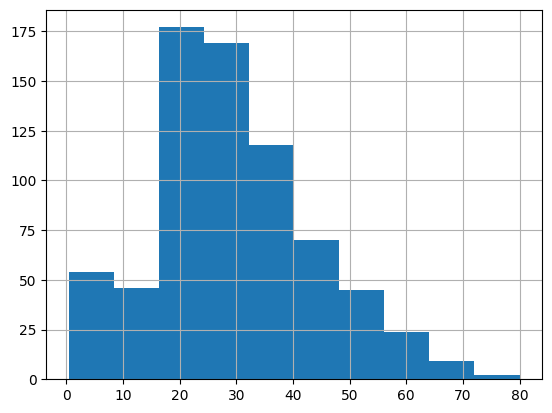

In [ ]:
titanic['Age'].hist() # mean or median

Notice that `Pclass` (passenger class: 1st, 2nd, or 3rd) is stored as an integer, but it's really a categorical variable. Similarly, `Survived` is a binary indicator (0 or 1) that could be stored more efficiently as a boolean. Let's convert these:

In [5]:
# Create a working copy to preserve original data
df = titanic.copy()

# Convert Pclass to category type (more memory-efficient for repeated values)
df['Pclass'] = df['Pclass'].astype('category')

# Convert Survived to boolean
df['Survived'] = df['Survived'].astype(bool)

print("Converted dtypes:")
print(df[['Pclass', 'Survived', 'Fare']].dtypes)

Converted dtypes:
Pclass      category
Survived        bool
Fare         float64
dtype: object


The result shows that `Pclass` is now a *category* dtype and `Survived` is a boolean. This means that categorical operations like `value_counts()` will be more efficient, and boolean indexing will be more semantically clear.

In [16]:
titanic = pd.get_dummies(titanic, columns=['Pclass', 'Sex'])
titanic

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,False,True,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,True,False,False,True,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,True,False,False,False,True


### Handling Problematic Conversions with `to_numeric()`

What happens when data doesn't convert cleanly? Consider a scenario where numeric data has been corrupted with text entries—this is surprisingly common in real-world datasets. The `astype()` method will raise an error in such cases, but `pd.to_numeric()` provides more graceful error handling.

The `to_numeric()` function can be thought of as a forgiving parser that tries its best to extract numbers from messy input, with options for how to handle the inevitable failures:

In [5]:
# Create a Series with problematic values
messy_ages = pd.Series(['22', '35', 'unknown', '28', 'N/A', '45'])

# Default behavior: raises an error
# pd.to_numeric(messy_ages)  # This would raise ValueError

# Coerce errors to NaN (recommended for data cleaning)
clean_ages = pd.to_numeric(messy_ages, errors='coerce')
print("Coerced result:")
print(clean_ages)

Coerced result:
0    22.0
1    35.0
2     NaN
3    28.0
4     NaN
5    45.0
dtype: float64


Notice how the non-numeric values `'unknown'` and `'N/A'` have been converted to `NaN` (Not a Number). This is often preferable to dropping rows or raising errors, as it preserves the data structure while marking problematic values for later handling. As we'll see in the next section, Pandas provides sophisticated tools for dealing with these missing values.

### Parsing Dates with `to_datetime()`

Date parsing is one of the trickiest aspects of data preprocessing because dates come in countless formats: "2024-01-15", "01/15/2024", "January 15, 2024", "15-Jan-24", and many more. The `pd.to_datetime()` function is like a polyglot date interpreter that can recognize and parse most common date formats automatically:

In [6]:
# Various date formats that to_datetime can parse
# In Pandas 2.x, use format='mixed' for heterogeneous date formats
date_strings = pd.Series([
    '2024-01-15',
    '01/15/2024',
    'January 15, 2024',
    '15-Jan-2024'
])

parsed_dates = pd.to_datetime(date_strings, format='mixed')
print("Parsed dates:")
print(parsed_dates)

Parsed dates:
0   2024-01-15
1   2024-01-15
2   2024-01-15
3   2024-01-15
dtype: datetime64[ns]


The result shows all dates converted to a consistent `datetime64` format. This enables powerful datetime operations like extracting components (year, month, day), calculating time differences, and time-based filtering. Keep in mind that while `to_datetime()` is remarkably flexible, ambiguous formats (like "01/02/03") may require explicit format specification using the `format` parameter.

Let's create a sample boarding date column for our Titanic data and extract useful features from it:

In [ ]:
import datetime as dt

dt.datetime(2025,12,5)
# dt.datetime(2025,12,5)+1 # 안 됨

datetime.datetime(2025, 12, 5, 0, 0)

In [7]:
import numpy as np

np.datetime64('2025-12-05')+1

np.datetime64('2025-12-06')

In [12]:
pd.to_datetime('20251205')

Timestamp('2025-12-05 00:00:00')

In [13]:
# The Titanic departed on April 10, 1912
# Let's create synthetic boarding dates for demonstration
np.random.seed(42)
boarding_offsets = np.random.randint(0, 3, size=len(df))  # 0-2 days before departure
df['BoardingDate'] = pd.to_datetime('1912-04-10') - pd.to_timedelta(boarding_offsets, unit='D')

# Extract datetime components
df['BoardingMonth'] = df['BoardingDate'].dt.month
df['BoardingDay'] = df['BoardingDate'].dt.day
df['DayOfWeek'] = df['BoardingDate'].dt.day_name()

df[['Name', 'BoardingDate', 'BoardingMonth', 'BoardingDay', 'DayOfWeek']].head()

,Name,BoardingDate,BoardingMonth,BoardingDay,DayOfWeek
0,"Braund, Mr. Owen Harris",1912-04-08,4,8,Monday
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1912-04-10,4,10,Wednesday
2,"Heikkinen, Miss. Laina",1912-04-08,4,8,Monday
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1912-04-08,4,8,Monday
4,"Allen, Mr. William Henry",1912-04-10,4,10,Wednesday


From what we've seen in this section, type conversion is not merely a technical necessity but a semantic decision. Choosing the right dtype—category for discrete values, boolean for binary flags, datetime for temporal data—makes subsequent analysis both more efficient and more expressive.

## Handling Missing Data

Real-world data is rarely complete. Patient records may lack certain test results; survey respondents skip questions; sensors malfunction and fail to record measurements. These gaps in our data can be thought of as holes in a fabric—we can try to patch them, work around them, or in some cases, simply accept them as part of the pattern.

Pandas uses the *sentinel value* approach to missing data, where special values (`NaN` for numeric data, `None` or `pd.NA` for other types) mark the absence of a value. This is like leaving a placeholder card in a recipe box where a recipe has been lost—the space is occupied, but meaningfully empty.

### Detecting Missing Values

Before we can address missing data, we need to know where it lurks. Let's examine our Titanic dataset for missing values:

In [17]:
# Count missing values in each column
missing_counts = titanic.isnull().sum()
missing_percent = (titanic.isnull().sum() / len(titanic)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percent': missing_percent.round(2)
})

# Show only columns with missing values
missing_summary[missing_summary['Missing Count'] > 0]

,Missing Count,Missing Percent
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


The output reveals three columns with missing data: `Age`, `Cabin`, and `Embarked`. Notice the different magnitudes—`Cabin` is missing for about 77% of passengers (likely because only upper-class passengers had assigned cabins), while `Embarked` is missing for just 2 passengers. These different patterns will require different handling strategies, as we'll explore next.

### Removing Missing Data with `dropna()`

The simplest approach to missing data is to remove it entirely. The `dropna()` method is like a strict bouncer at a club—any row (or column) with missing values is denied entry. While straightforward, this approach requires caution as it can significantly reduce your dataset size:

In [18]:
# Reset df to original data
df = titanic.copy()

# Drop rows where ANY value is missing (aggressive)
df_complete = df.dropna()
print(f"Original rows: {len(df)}")
print(f"After dropping any missing: {len(df_complete)}")
print(f"Data loss: {100 * (1 - len(df_complete)/len(df)):.1f}%")

Original rows: 891
After dropping any missing: 183
Data loss: 79.5%


The result shows dramatic data loss—we've discarded over 77% of our data! This is because `Cabin` is missing for most passengers. A more targeted approach is to drop only based on specific columns:

In [19]:
# Drop rows only where Age or Embarked is missing (more conservative)
df_partial = df.dropna(subset=['Age', 'Embarked'])
print(f"Original rows: {len(df)}")
print(f"After dropping Age/Embarked missing: {len(df_partial)}")
print(f"Data loss: {100 * (1 - len(df_partial)/len(df)):.1f}%")

Original rows: 891
After dropping Age/Embarked missing: 712
Data loss: 20.1%


By targeting only `Age` and `Embarked`, we've preserved much more of our data. The `subset` parameter allows us to focus our missing-value handling on the columns that matter for our analysis.

### Filling Missing Values with `fillna()`

Rather than discarding incomplete records, we can often *impute* missing values—that is, fill them with reasonable estimates. The `fillna()` method can be thought of as a gap-filling tool that patches holes with specified values. The art lies in choosing appropriate fill values that don't distort your analysis.

#### Filling with Constants

The simplest imputation strategy is to fill missing values with a constant. This works well when a sensible default exists:

In [23]:
# Fill missing Cabin values with 'Unknown'
df = titanic.copy()
df['Cabin'] = df['Cabin'].fillna('Unknown')

print("Cabin value counts after filling:")
print(df['Cabin'].value_counts().head())

Cabin value counts after filling:
Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: count, dtype: int64


#### Filling with Statistical Measures

For numeric columns like `Age`, filling with a statistical measure (mean, median, or mode) often makes more sense than an arbitrary constant. The median is typically preferred for skewed distributions as it's less sensitive to outliers:

In [24]:
# Calculate statistics before filling
print(f"Age statistics (before filling):")
print(f"  Mean: {df['Age'].mean():.2f}")
print(f"  Median: {df['Age'].median():.2f}")
print(f"  Missing: {df['Age'].isnull().sum()}")

# Fill with median (more robust to outliers)
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print(f"\nAfter filling with median ({median_age}):")
print(f"  Missing: {df['Age'].isnull().sum()}")

Age statistics (before filling):
  Mean: 29.70
  Median: 28.00
  Missing: 177

After filling with median (28.0):
  Missing: 0


#### Group-Wise Imputation

A more sophisticated approach is to fill missing values based on group membership. For example, we might expect passengers of different classes or genders to have different age distributions. This technique can be thought of as context-aware imputation—using what we know about related passengers to make better guesses:

In [13]:
# Reset and demonstrate group-wise imputation
df = titanic.copy()

# Calculate median age by Pclass and Sex
median_by_group = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')

# Fill missing ages with group-specific median
df['Age'] = df['Age'].fillna(median_by_group)

# Check the group medians used
print("Median age by Pclass and Sex:")
print(titanic.groupby(['Pclass', 'Sex'])['Age'].median())

Median age by Pclass and Sex:
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


Notice how the median ages vary significantly by group—first-class females tend to be older, while third-class males tend to be younger. By using group-specific medians, our imputation better preserves the underlying structure of the data.

#### Filling with Forward/Backward Fill

For time-series or ordered data, forward fill (`ffill`) and backward fill (`bfill`) propagate the last known value. These methods can be thought of as assuming that missing values should equal their temporal neighbors:

In [14]:
# Demonstrate forward and backward fill
sample = pd.Series([1.0, np.nan, np.nan, 4.0, np.nan, 6.0])

print("Original:", sample.values)
print("Forward fill:", sample.ffill().values)
print("Backward fill:", sample.bfill().values)

Original: [ 1. nan nan  4. nan  6.]
Forward fill: [1. 1. 1. 4. 4. 6.]
Backward fill: [1. 4. 4. 4. 6. 6.]


In the next section, we'll explore how to encode categorical variables—a crucial step for preparing data for machine learning algorithms, which typically require numeric input.

## Encoding Categorical Variables

Machine learning algorithms speak the language of numbers. While humans can easily understand categories like "male" and "female" or "first class" and "third class", algorithms require these concepts to be translated into numerical form. Encoding categorical variables can be thought of as creating a numeric vocabulary that captures the meaning of categorical labels.

There are two main encoding strategies, each suited to different types of categorical data: *label encoding* for ordinal categories with a natural order, and *one-hot encoding* for nominal categories with no inherent ranking.

### Label Encoding with `map()`

Label encoding assigns each category a numeric value. This approach is like numbering items in a list—straightforward and compact. The `map()` method in Pandas provides an elegant way to perform this transformation using a dictionary that defines the mapping:

In [15]:
df = titanic.copy()

# Define the mapping for Sex
sex_mapping = {'male': 0, 'female': 1}

# Apply the mapping
df['Sex_encoded'] = df['Sex'].map(sex_mapping)

# Verify the transformation
print("Before and after encoding:")
print(df[['Sex', 'Sex_encoded']].drop_duplicates())

Before and after encoding:
      Sex  Sex_encoded
0    male            0
1  female            1


Label encoding is particularly appropriate for *ordinal* categories—those with a natural order. Consider the `Embarked` column, which indicates the port of embarkation. If we wanted to encode the ports by their order along the voyage (Southampton → Cherbourg → Queenstown), label encoding would preserve this ordering:

In [16]:
# Encode Embarked by voyage order
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}  # Southampton, Cherbourg, Queenstown
df['Embarked_encoded'] = df['Embarked'].map(embarked_mapping)

print("Embarkation port encoding:")
print(df[['Embarked', 'Embarked_encoded']].drop_duplicates().dropna())

Embarkation port encoding:
  Embarked  Embarked_encoded
0        S               0.0
1        C               1.0
5        Q               2.0


Notice the potential point of confusion here: label encoding implies an ordering relationship between categories. For nominal categories (like colors or country names) where no such ordering exists, one-hot encoding is usually more appropriate.

### One-Hot Encoding with `pd.get_dummies()`

One-hot encoding can be thought of as creating a binary flag for each category. Instead of a single column with numeric labels, we create multiple columns—one per category—where each contains 1 if the row belongs to that category and 0 otherwise. This is like having separate yes/no checkboxes for each possible answer.

The `pd.get_dummies()` function automates this transformation:

In [17]:
# One-hot encode the Embarked column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

print("One-hot encoded Embarked:")
print(embarked_dummies.head(10))

One-hot encoded Embarked:
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True
5       False        True       False
6       False       False        True
7       False       False        True
8       False       False        True
9        True       False       False


The result shows three new columns: `Embarked_C`, `Embarked_Q`, and `Embarked_S`. Each row has exactly one `True` (or 1) value, indicating which port that passenger boarded at. The `prefix` parameter adds a descriptive prefix to distinguish these columns from others.

Let's apply one-hot encoding to multiple categorical columns at once and merge them back into our DataFrame:

In [18]:
# Select columns for one-hot encoding
df = titanic.copy()

# One-hot encode Sex and Embarked, converting to integer (0/1)
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype=int)

# Show the new columns
new_cols = [col for col in df_encoded.columns if 'Sex_' in col or 'Embarked_' in col]
print(f"New columns created: {new_cols}")
df_encoded[new_cols].head()

New columns created: ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


#### Avoiding the Dummy Variable Trap

When using one-hot encoded features in linear models, including all dummy columns creates perfect multicollinearity—knowing the values of all but one column perfectly predicts the remaining one. To avoid this, we can drop one category using `drop_first=True`:

In [19]:
# One-hot encode with drop_first to avoid multicollinearity
df = titanic.copy()
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

new_cols = [col for col in df_encoded.columns if 'Sex_' in col or 'Embarked_' in col]
print(f"Columns after drop_first: {new_cols}")
df_encoded[new_cols].head()

Columns after drop_first: ['Sex_male', 'Embarked_Q', 'Embarked_S']


,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


Notice that now we have `Sex_male` (female is the reference category) and `Embarked_Q` and `Embarked_S` (C is the reference category). This maintains all the information while avoiding linear dependence between features.

## Extracting Features from Strings

Text data often contains valuable information locked away in unstructured formats. The passenger names in our Titanic dataset are a perfect example—embedded within each name is a title (Mr., Mrs., Miss, etc.) that reveals social status, marital status, and approximate age range. Extracting these hidden features is like mining for gold in text: the value is there, but it requires the right tools to uncover it.

Pandas provides the `.str` accessor, which can be thought of as a gateway to a rich collection of string manipulation methods. Combined with regular expressions, it becomes a powerful tool for pattern-based text extraction.

### Extracting Titles with Regular Expressions

Let's examine the name format in our dataset:

In [20]:
df = titanic.copy()
print("Sample names:")
for name in df['Name'].head(5):
    print(f"  {name}")

Sample names:
  Braund, Mr. Owen Harris
  Cumings, Mrs. John Bradley (Florence Briggs Thayer)
  Heikkinen, Miss. Laina
  Futrelle, Mrs. Jacques Heath (Lily May Peel)
  Allen, Mr. William Henry


We can see a consistent pattern: names follow the format "Last, Title. First (Maiden)". The title appears after the comma and before the period. We can extract this using the `str.extract()` method with a regular expression:

In [21]:
# Extract title using regex: match word characters followed by a period
# The pattern captures text between ', ' and '.'
df['Title'] = df['Name'].str.extract(r', ([A-Za-z]+)\.', expand=False)

print("Title distribution:")
print(df['Title'].value_counts())

Title distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Mme           1
Ms            1
Sir           1
Lady          1
Capt          1
Jonkheer      1
Name: count, dtype: int64


The output reveals a rich variety of titles, from common ones (Mr, Miss, Mrs) to rare ones (Lady, Countess, Capt). As we'll see shortly, we can consolidate these rare titles to reduce noise in our features.

### Consolidating Rare Categories

Having too many categories can cause problems—rare categories have few examples to learn from and can lead to overfitting. The `replace()` method allows us to consolidate similar or rare titles:

In [22]:
# Define mapping for rare titles
title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
}

df['Title'] = df['Title'].replace(title_mapping)

print("Consolidated title distribution:")
print(df['Title'].value_counts())

Consolidated title distribution:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       22
Name: count, dtype: int64


Now we have a cleaner set of four categories: Mr, Miss, Mrs, Master, and Rare. This is much more manageable for machine learning while still preserving the key social information encoded in titles.

### Other String Operations

The `.str` accessor provides many other useful methods. Let's explore a few:

In [23]:
# Extract last name (before the comma)
df['LastName'] = df['Name'].str.split(',').str[0]

# Check name length (could indicate nobility with longer titles)
df['NameLength'] = df['Name'].str.len()

# Check if name contains certain patterns
df['HasParentheses'] = df['Name'].str.contains(r'\(', regex=True)

print(df[['Name', 'LastName', 'NameLength', 'HasParentheses']].head())

                                                Name   LastName  NameLength  \
0                            Braund, Mr. Owen Harris     Braund          23   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings          51   
2                             Heikkinen, Miss. Laina  Heikkinen          22   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle          44   
4                           Allen, Mr. William Henry      Allen          24   

   HasParentheses  
0           False  
1            True  
2           False  
3            True  
4           False  


Notice that names containing parentheses often indicate married women whose maiden names are included. This could be a useful feature for understanding family relationships aboard the ship.

### Extracting Cabin Information

The `Cabin` column, despite having many missing values, contains structured information—a letter prefix indicating the deck. Let's extract this:

In [24]:
# Extract deck letter from Cabin (first character)
df['Deck'] = df['Cabin'].str.extract(r'([A-Z])', expand=False)

print("Deck distribution:")
print(df['Deck'].value_counts())

Deck distribution:
Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


The extracted deck letters (A through G) correspond to different levels of the ship. Deck location could be correlated with survival—passengers on higher decks may have had easier access to lifeboats. From what we've seen, string extraction can uncover valuable hidden features within text columns.

## Feature Engineering: Creating New Features

Sometimes the most predictive features aren't in the original data—they need to be constructed from existing features. Feature engineering can be thought of as the creative act of synthesizing new information from raw ingredients. Just as a chef combines basic ingredients into complex flavors, a data scientist combines existing features into new ones that better capture patterns in the data.

In the following sections, we'll explore several feature engineering techniques: combining features, binning continuous variables, and creating interaction terms.

### Combining Features

Individual features may not tell the whole story, but combined features can reveal important patterns. Let's create a feature for family size:

In [25]:
df = titanic.copy()

# SibSp = number of siblings/spouses aboard
# Parch = number of parents/children aboard
# Add 1 for the passenger themselves
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print("Family size distribution:")
print(df['FamilySize'].value_counts().sort_index())

Family size distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


We can further categorize passengers based on whether they were traveling alone:

In [26]:
# Create binary feature for solo travelers
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Create family size category
df['FamilyCategory'] = df['FamilySize'].apply(
    lambda x: 'Solo' if x == 1 else ('Small' if x <= 4 else 'Large')
)

print("Family category distribution:")
print(df['FamilyCategory'].value_counts())

Family category distribution:
FamilyCategory
Solo     537
Small    292
Large     62
Name: count, dtype: int64


### Binning Continuous Variables with `cut()` and `qcut()`

Continuous variables like `Age` and `Fare` contain fine-grained information that can sometimes obscure broader patterns. Binning these variables into discrete categories can be thought of as stepping back to see the forest instead of individual trees. Pandas provides two functions for this:

- `pd.cut()`: Creates bins of equal width
- `pd.qcut()`: Creates bins of equal frequency (quantile-based)

In [27]:
# Fill missing ages first
df['Age'] = df['Age'].fillna(df['Age'].median())

# Bin ages into equal-width categories
df['AgeGroup_EqualWidth'] = pd.cut(df['Age'], 
                                    bins=[0, 12, 18, 35, 60, 100],
                                    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

print("Age groups (equal width bins):")
print(df['AgeGroup_EqualWidth'].value_counts())

Age groups (equal width bins):
AgeGroup_EqualWidth
Young Adult    535
Adult          195
Teen            70
Child           69
Senior          22
Name: count, dtype: int64


Notice that the bins have very different sizes—there are many more "Young Adult" and "Adult" passengers than "Senior" passengers. This is because `cut()` creates equal-width bins, not equal-frequency bins.

Let's compare with `qcut()`, which creates bins with approximately equal numbers of observations:

In [28]:
# Bin ages into equal-frequency categories
# Note: After imputation, some quantile boundaries may coincide
# We'll use 4 quantiles for more reliable binning
df['AgeGroup_Quantile'] = pd.qcut(df['Age'], 
                                   q=4, 
                                   labels=['Young', 'Middle-Young', 'Middle-Old', 'Old'])

print("Age groups (quantile-based bins):")
print(df['AgeGroup_Quantile'].value_counts())

Age groups (quantile-based bins):
AgeGroup_Quantile
Middle-Young    308
Young           231
Old             217
Middle-Old      135
Name: count, dtype: int64


Now each bin contains roughly the same number of passengers. The choice between `cut()` and `qcut()` depends on your analysis goals: use `cut()` when the bin boundaries are semantically meaningful (like life stages), and `qcut()` when you want balanced groups for statistical comparison.

Let's also bin the `Fare` column, which represents ticket price and might be a proxy for socioeconomic status:

In [29]:
# Examine fare distribution first
print(f"Fare statistics:")
print(f"  Min: ${df['Fare'].min():.2f}")
print(f"  Max: ${df['Fare'].max():.2f}")
print(f"  Median: ${df['Fare'].median():.2f}")
print(f"  Mean: ${df['Fare'].mean():.2f}")

# Create fare bands using quantiles
df['FareBand'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("\nFare band distribution:")
print(df['FareBand'].value_counts())

Fare statistics:
  Min: $0.00
  Max: $512.33
  Median: $14.45
  Mean: $32.20

Fare band distribution:
FareBand
Medium       224
Low          223
High         222
Very High    222
Name: count, dtype: int64


The result shows evenly distributed fare bands. Keep in mind that the "Low" and "Very High" categories span very different fare ranges due to the skewed distribution of ticket prices.

### Creating Interaction Features

Sometimes the relationship between a feature and the target depends on another feature. These *interaction effects* can be captured by creating new features that combine existing ones. For example, the effect of passenger class on survival might differ by gender:

In [30]:
# Create interaction feature: Pclass × Sex
df['Pclass_Sex'] = df['Pclass'].astype(str) + '_' + df['Sex']

# Calculate survival rate by this interaction
survival_by_interaction = df.groupby('Pclass_Sex')['Survived'].agg(['mean', 'count'])
survival_by_interaction.columns = ['Survival Rate', 'Count']
survival_by_interaction = survival_by_interaction.sort_values('Survival Rate', ascending=False)

print("Survival by Pclass × Sex:")
print(survival_by_interaction)

Survival by Pclass × Sex:
            Survival Rate  Count
Pclass_Sex                      
1_female         0.968085     94
2_female         0.921053     76
3_female         0.500000    144
1_male           0.368852    122
2_male           0.157407    108
3_male           0.135447    347


The result reveals a striking pattern: first-class females had the highest survival rate (around 97%), while third-class males had the lowest (around 14%). This interaction between class and gender was far more predictive than either feature alone—a powerful demonstration of why feature engineering matters.

## Putting It All Together

From what we've seen throughout this section, data preprocessing is not a single operation but a pipeline of transformations that prepare raw data for analysis. Let's consolidate our preprocessing steps into a complete workflow:

In [31]:
def preprocess_titanic(df):
    """
    Complete preprocessing pipeline for Titanic data.
    Returns a cleaned DataFrame ready for machine learning.
    """
    # Create a copy to avoid modifying the original
    data = df.copy()
    
    # 1. Handle missing values
    # Fill Age with group median
    data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(
        lambda x: x.fillna(x.median())
    )
    # Fill remaining with overall median (edge cases)
    data['Age'] = data['Age'].fillna(data['Age'].median())
    
    # Fill Embarked with mode
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    
    # Fill Fare with median
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    
    # 2. Extract features from strings
    # Extract title
    data['Title'] = data['Name'].str.extract(r', ([A-Za-z]+)\.', expand=False)
    title_mapping = {
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare',
        'Col': 'Rare', 'Don': 'Rare', 'Dr': 'Rare',
        'Major': 'Rare', 'Rev': 'Rare', 'Sir': 'Rare',
        'Jonkheer': 'Rare', 'Dona': 'Rare'
    }
    data['Title'] = data['Title'].replace(title_mapping)
    
    # Extract deck from Cabin
    data['Deck'] = data['Cabin'].str.extract(r'([A-Z])', expand=False)
    data['Deck'] = data['Deck'].fillna('Unknown')
    
    # 3. Create new features
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
    
    # Age bins
    data['AgeGroup'] = pd.cut(data['Age'], 
                              bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
    
    # Fare bins
    data['FareBand'] = pd.qcut(data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
    
    # 4. Encode categorical variables
    data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareBand'], 
                          drop_first=True, dtype=int)
    
    # 5. Drop unnecessary columns
    cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    data = data.drop(columns=cols_to_drop)
    
    return data

# Apply the preprocessing pipeline
titanic_processed = preprocess_titanic(titanic)

print(f"Original shape: {titanic.shape}")
print(f"Processed shape: {titanic_processed.shape}")
print(f"\nProcessed columns:")
print(titanic_processed.columns.tolist())

Original shape: (891, 12)
Processed shape: (891, 23)

Processed columns:
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teen', 'AgeGroup_YoungAdult', 'AgeGroup_Adult', 'AgeGroup_Senior', 'FareBand_Medium', 'FareBand_High', 'FareBand_VeryHigh']


In [32]:
# Verify no missing values remain
print("Missing values after preprocessing:")
print(titanic_processed.isnull().sum().sum())

# Preview the processed data
titanic_processed.head()

Missing values after preprocessing:
0


,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,FamilySize,IsAlone,Sex_male,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior,FareBand_Medium,FareBand_High,FareBand_VeryHigh
0,0,3,22.0,1,0,7.2500,Unknown,2,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,C,2,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,Unknown,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,C,2,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,Unknown,1,1,1,...,1,0,0,0,1,0,0,1,0,0


The result is a clean dataset with 24 features, all numeric or boolean, with no missing values. This data is now ready for machine learning algorithms.

## Summary

In this section, we've explored the essential data preprocessing techniques that transform raw, messy data into a form suitable for analysis. As we've seen, this process involves several key steps:

- **Type conversion**: Using `astype()`, `to_numeric()`, and `to_datetime()` to ensure data is stored in appropriate formats
- **Missing value handling**: Detecting gaps with `isnull()`, removing them with `dropna()`, or filling them with `fillna()` using strategies ranging from simple constants to group-wise imputation
- **Categorical encoding**: Translating text categories into numbers using label encoding with `map()` or one-hot encoding with `pd.get_dummies()`
- **String feature extraction**: Mining text fields for hidden information using the `.str` accessor and regular expressions
- **Feature engineering**: Creating new features through combination, binning with `cut()` and `qcut()`, and interaction terms

These techniques form the foundation of any data science workflow. As you work with real-world datasets, you'll find that preprocessing often consumes more time than modeling—but this investment pays dividends in model performance and interpretability. In the next section, we'll build on these preprocessing skills to explore data aggregation and grouping operations.